<a href="https://colab.research.google.com/github/19521309/19521309/blob/main/phanlop_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HỌ VÀ TÊN: ĐINH HOÀNG LINH ĐAN

MSSV: 19521309


In [ ]:
import numpy as np
import pandas as pd

Bước 1: Load dữ liệu (chú ý bỏ những dữ liệu mang tính thứ tự, định danh và không liên quan đến việc phán đoán kết quả

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
del df['RowNumber']
del df['CustomerId']
del df['Surname']

Bước 2: chuyển đổi các dữ liệu dạng ko có thứ tự

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Geography'] = encoder.fit_transform(df['Geography'])

In [ ]:
X = df[['CreditScore', 'Geography', 'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df['Exited']

Bước 3: CHia ra làm 2 phần train và test với tỉ lệ 8:2

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.2)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(8000, 10) (1600, 10) (400, 10) (8000,) (1600,) (400,)


Bước 4: Chuẩn hóa đặc trưng với StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

Bước 5: Build mạng Neural Network với kiến trúc: Input --> 6 neurons/ReLU --> 6 neurons/ReLU --> 1 neuron / sigmoid


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Bước 5: Huấn luyện với thuật toán Adam, sử dụng hàm loss sau: Binary Cross entropy, batch size = 32, epoch = 100

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4751 - accuracy: 0.7906 - val_loss: 0.4495 - val_accuracy: 0.8031
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8259 - val_loss: 0.4166 - val_accuracy: 0.8356
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8478 - val_loss: 0.3892 - val_accuracy: 0.8531
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8550 - val_loss: 0.3774 - val_accuracy: 0.8531
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8577 - val_loss: 0.3705 - val_accuracy: 0.8550
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8580 - val_loss: 0.3700 - val_accuracy: 0.8550
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8599 - val_loss: 0.3656 - val_accuracy: 0.8600

Bước 6: test và đánh giá độ chính xác

In [ ]:
model.evaluate(X_test, Y_test)[1]

13/13 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8375


0.8374999761581421

In [ ]:
import matplotlib.pyplot as plt


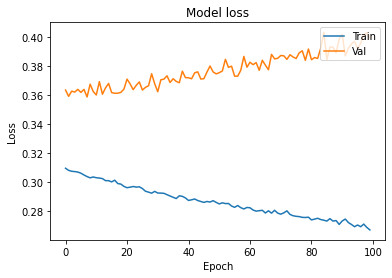

In [ ]:
vplt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Bước 7: thử nghiệm xem với khách hàng có thông tin sau thì có nên exit hay ko?
Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

No.of Products: 2

Has credit card: Yes

Active Member: Yes

Estimated Salary: $50000


In [ ]:
datatest = pd.read_csv('/content/data_test.csv')

In [ ]:
datatest['Gender'] = encoder.fit_transform(datatest['Gender'])
datatest['Geography'] = encoder.fit_transform(datatest['Geography'])

In [ ]:
datatest

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,0,0,40,3,60000,2,1,1,50000


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
model.predict(datatest)

array([[0.]], dtype=float32)

Kết quả = 0  

Bước 8: đánh giá độ chính xác của kiến trúc này bằng phương pháp KFold Cross Validation với K=5



In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy of Model with Cross Validation is: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of Model with Cross Validation is: 0.808 (0.007)
